# Salary Predictions Based on Job Descriptions

The methodology used to carry out this project was the __"4D's Data Science Framework"__, as follows: <br/>

__1D - Define <br/>__
    _- Define the Problem_ <br/>
    
__2D - Discover <br/>__
    _- Obtain the Data_ <br/>
    _- Clean the Data_ <br/>
    _- Explore the Data_ <br/>
    _- Establish Baseline Outcomes_ <br/>
    _- Hypothesize Solutions_ <br/>
    
__3D - Develop <br/>__
    _- Engineer Features_ <br/>
    _- Create Models_ <br/>
    _- Test Models_ <br/>
    _- Select Best Models_ <br/>
    
__4D - Deploy <br/>__
    _- Automate Pipeline_ <br/>
    _- Deploy Solution_ <br/>
    _- Measure Efficacy_ <br/>

## Part 1 - DEFINE

### ---- 1.1 Define The Problem ----

The aim of this project is to examine a job offers dataset and then __build a predictive model that provides for salaries based on job descriptions offered.__ <br/>
For this project, I will use the MSE as a metric to measure the result of model created. <br/>
Expected result: <br/>
__- Find a model that can achieve at least 70% improvement over the baseline model.__

## Part 2 - DISCOVER

### ---- 2.1 Import The Libraries ----

In [1]:
#import your libraries
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import cross_val_score

#etc

#your info here
__author__ = "João Vitor Ramos"
__email__ = "jvpr1981@gmail.com"

### ---- 2.2 Load The Data ----

In [2]:
#Load the data into a Pandas dataframe

#Training table of the model with all information about jobs (Without salaries).
train_features = pd.read_csv("/Users/joao/Documents/Portfolio/Salary_Forecast_Project/data/train_features.csv")

#Test table of the model with all information about the jobs (Without wages).
test_features = pd.read_csv("/Users/joao/Documents/Portfolio/Salary_Forecast_Project/data/test_features.csv")

#Training table of the model with only two information: "JobId" and "Salary".
train_salaries = pd.read_csv("/Users/joao/Documents/Portfolio/Salary_Forecast_Project/data/train_salaries.csv")

### ---- 2.3 Examine the Data ----

In [3]:
train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [4]:
test_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [5]:
train_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [6]:
#check length and dtypes (train_features)
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
#check length and dtypes (test_features)
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [8]:
#check length and dtypes (train_salaries)
train_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


### ---- 2.4 Join the 2 Training Datas (train_features + train_salaries) ----

In [9]:
new_train_features = pd.merge(train_features, train_salaries, on = "jobId", how = "left")

In [10]:
#check the new formed dataset (new_train_features)
new_train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [11]:
#check length and dtypes (new_train_features)
new_train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### ---- 2.5 Clean The Data ----

In [12]:
#Checking for missing values (test_features)
test_features.isnull().sum().sort_values(ascending = False)

milesFromMetropolis    0
yearsExperience        0
industry               0
major                  0
degree                 0
jobType                0
companyId              0
jobId                  0
dtype: int64

In [13]:
#Checking for missing values (new_train_features)
new_train_features.isnull().sum().sort_values(ascending = False)

salary                 0
milesFromMetropolis    0
yearsExperience        0
industry               0
major                  0
degree                 0
jobType                0
companyId              0
jobId                  0
dtype: int64

In [14]:
#Checking duplicated data rows (test_features)
test_features.duplicated().sum()

0

In [15]:
#Checking duplicated data rows (new_train_features)
new_train_features.duplicated().sum()

0

In [16]:
#Looking for invalid data or corrupt data (test_features: yearsExperience)
test_features[test_features["yearsExperience"] < 0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis


In [17]:
#Looking for invalid data or corrupt data (new_train_features: yearsExperience)
new_train_features[new_train_features["yearsExperience"] < 0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [18]:
#Looking for invalid data or corrupt data (test_features: milesFromMetropolis)
test_features[test_features["milesFromMetropolis"] < 0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis


In [19]:
#Looking for invalid data or corrupt data (new_train_features: milesFromMetropolis)
new_train_features[new_train_features["milesFromMetropolis"] < 0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [20]:
#Looking for invalid data or corrupt data (new_train_features: salary)
new_train_features[new_train_features["salary"] <= 0]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [21]:
#Putting in the zero_salaries_index variable all the indexes of the job offers with salaries = zero.
zero_salaries_index = new_train_features[new_train_features["salary"] <= 0].index

In [22]:
#Excluding the 5 rows with zero salaries
new_train_features.drop(zero_salaries_index, inplace=True )

In [23]:
#check the new formed dataset (new_train_features)
new_train_features.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [24]:
#Check length and dtypes (new_train_features)
#Note that after the exclusions it has 999.995 rows.
new_train_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                999995 non-null  object
 1   companyId            999995 non-null  object
 2   jobType              999995 non-null  object
 3   degree               999995 non-null  object
 4   major                999995 non-null  object
 5   industry             999995 non-null  object
 6   yearsExperience      999995 non-null  int64 
 7   milesFromMetropolis  999995 non-null  int64 
 8   salary               999995 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


### ---- 2.6 Explore the Data (EDA) ----

In [25]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

### ---- 2.6.1 Identify numerical and categorical variables ----

In [26]:
#Identify the variable names
new_train_features.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [27]:
#Identify the categorical variables
categorical_cols = ["jobId", "companyId", "jobType", "degree", "major", "industry"]

In [28]:
#Identify the numerical variables
#Note that I didn't get the variable "salary" because it is my target.
numerical_cols = ["yearsExperience", "milesFromMetropolis"]

### ---- 2.6.2 Summarize Numerical Variables ----

In [29]:
new_train_features[numerical_cols].describe()

,yearsExperience,milesFromMetropolis
count,999995.000000,999995.000000
mean,11.992407,49.529381
std,7.212390,28.877721
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


### ---- 2.6.3 Summarize Categorical Variables ----

In [30]:
new_train_features[categorical_cols].describe()

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362684761770,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205


### ---- 2.6.4 Summarize The Target Variable ----

In [31]:
new_train_features["salary"].describe()

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64

### ---- 2.6.4.1 Visualize Target Variable (Salary) ----

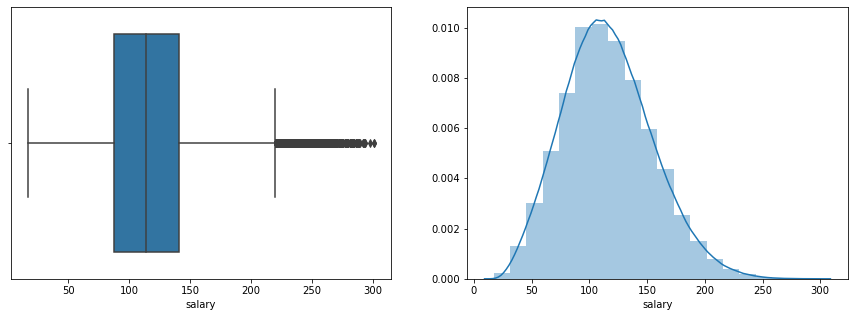

In [32]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(new_train_features.salary)
plt.subplot(1,2,2)
sns.distplot(new_train_features.salary, bins=20)
plt.show()

### ---- 2.6.4.2 IQR Rule - Identify Potential Outliers (Salary) ----

In [33]:
stat = new_train_features.salary.describe()
print(stat)
IQR = stat['75%'] - stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper and lower bounds for suspected outliers are {} and {}.'.format(upper, lower))

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5.


### ---- 2.6.4.2.1 IQR Rule - Examine Potential Outliers (Salary) ----

In [34]:
#Check potential outlier below lower bound
out_lower_data = new_train_features[new_train_features.salary < 8.5]
out_lower_data

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [35]:
#Check potential outlier above upper bound
out_upper_data = new_train_features[new_train_features.salary > 220.5]
out_upper_data

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [36]:
out_upper_data.groupby(['jobType']).count()

,jobId,companyId,degree,major,industry,yearsExperience,milesFromMetropolis,salary
jobType,,,,,,,,
CEO,3227,3227,3227,3227,3227,3227,3227,3227
CFO,1496,1496,1496,1496,1496,1496,1496,1496
CTO,1488,1488,1488,1488,1488,1488,1488,1488
JUNIOR,20,20,20,20,20,20,20,20
MANAGER,217,217,217,217,217,217,217,217
SENIOR,66,66,66,66,66,66,66,66
VICE_PRESIDENT,603,603,603,603,603,603,603,603


Doing a quick analysis of the data above we can say that outliers make sense when we look at the positions held by employees, with the exception of "Junior". We need to go into the higher level of detail to understand whether the data is correct.

In [37]:
out_upper_data.groupby(['jobType']).mean()

,yearsExperience,milesFromMetropolis,salary
jobType,,,
CEO,19.475984,23.017354,235.938953
CFO,20.348930,19.959893,233.816845
CTO,20.129704,20.081989,233.889113
JUNIOR,22.750000,8.950000,227.800000
MANAGER,21.364055,14.000000,231.566820
SENIOR,22.257576,10.651515,229.196970
VICE_PRESIDENT,20.842454,16.925373,232.325041


Here we can see that "Junior" has a slightly lower average salary than other outliers, but has more work experience.

In [38]:
out_upper_data[out_upper_data.jobType == "JUNIOR"].groupby(["degree"]).count()

,jobId,companyId,jobType,major,industry,yearsExperience,milesFromMetropolis,salary
degree,,,,,,,,
BACHELORS,1,1,1,1,1,1,1,1
DOCTORAL,14,14,14,14,14,14,14,14
MASTERS,5,5,5,5,5,5,5,5


Here we can see that more than 90% of employees with "Junior" positions have masters or doctorates, which helps us to understand higher saláries.

In [39]:
out_upper_data[out_upper_data.jobType == "JUNIOR"].groupby(["major"]).count()

,jobId,companyId,jobType,degree,industry,yearsExperience,milesFromMetropolis,salary
major,,,,,,,,
BUSINESS,10,10,10,10,10,10,10,10
COMPSCI,2,2,2,2,2,2,2,2
ENGINEERING,8,8,8,8,8,8,8,8


Here I can't see anything important that justifies the high salaries for "Junior" positions.

In [40]:
out_upper_data[out_upper_data.jobType == "JUNIOR"].groupby(["industry"]).count()

,jobId,companyId,jobType,degree,major,yearsExperience,milesFromMetropolis,salary
industry,,,,,,,,
FINANCE,8,8,8,8,8,8,8,8
OIL,11,11,11,11,11,11,11,11
WEB,1,1,1,1,1,1,1,1


Here we have one more important point to note. Over 90% of employees in "Junior" positions work in oil and finance companies where we know they normally pay better salaries. So, let's keep the data and continue our analysis.

### ---- 2.6.5 Look for Correlation Between Each Feature and The Target ----

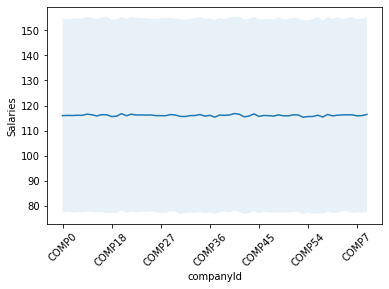

In [41]:
#Correlation of numerical features and the target "companyId"
mean = new_train_features.groupby("companyId")['salary'].mean()
std = new_train_features.groupby("companyId")['salary'].std()
mean.plot()
plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                 alpha = 0.1)
plt.xticks(rotation=45)
plt.ylabel('Salaries')
plt.show()

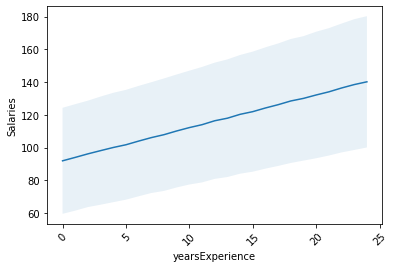

In [42]:
#Correlation of numerical features and the target "yearsExperience"
mean = new_train_features.groupby("yearsExperience")['salary'].mean()
std = new_train_features.groupby("yearsExperience")['salary'].std()
mean.plot()
plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                 alpha = 0.1)
plt.xticks(rotation=45)
plt.ylabel('Salaries')
plt.show()

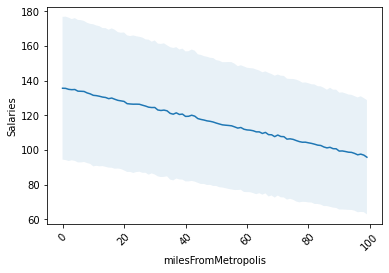

In [43]:
#correlation of numerical features and the target "milesFromMetropolis"
mean = new_train_features.groupby("milesFromMetropolis")['salary'].mean()
std = new_train_features.groupby("milesFromMetropolis")['salary'].std()
mean.plot()
plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                 alpha = 0.1)
plt.xticks(rotation=45)
plt.ylabel('Salaries')
plt.show()

In the 3 plots above we can see that:
The salary is weakly associated with the "companyId" variable. The "yearsExperience" has a positive relationship with our target variable "salary". So we can conclude that the more experience, the higher the salary. When we look at the correlation between "milesFromMetropolis" and "salary", we see the exact opposite.

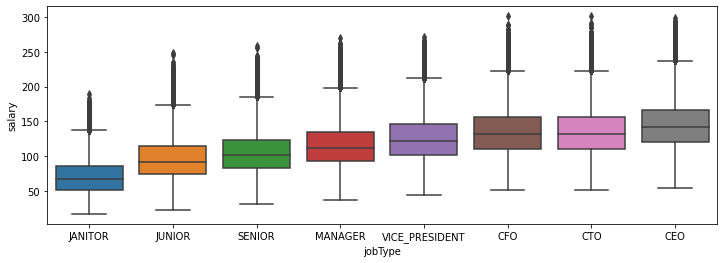

In [44]:
#Correlation of categorical features and the target

#Feature "jobType"
plt.figure(figsize = (12,4))
mean = new_train_features.groupby("jobType")['salary'].mean()
levels = mean.sort_values().index.tolist()
sns.boxplot(x="jobType", y="salary", data=new_train_features, order = levels)

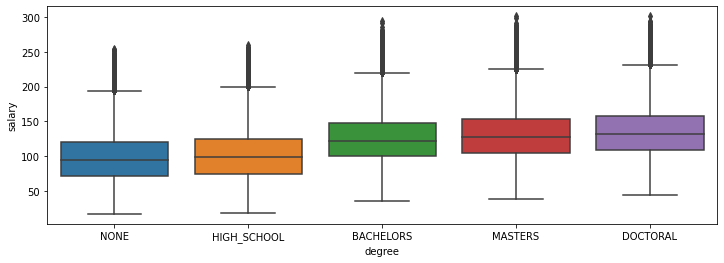

In [45]:
#Feature "degree"
plt.figure(figsize = (12,4))
mean = new_train_features.groupby("degree")['salary'].mean()
levels = mean.sort_values().index.tolist()
sns.boxplot(x="degree", y="salary", data=new_train_features, order = levels)

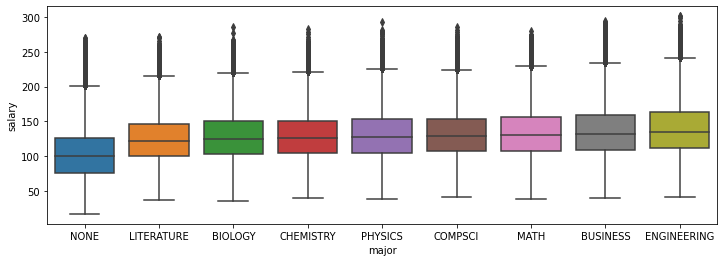

In [46]:
#Feature "major"
plt.figure(figsize = (12,4))
mean = new_train_features.groupby("major")['salary'].mean()
levels = mean.sort_values().index.tolist()
sns.boxplot(x="major", y="salary", data=new_train_features, order = levels)

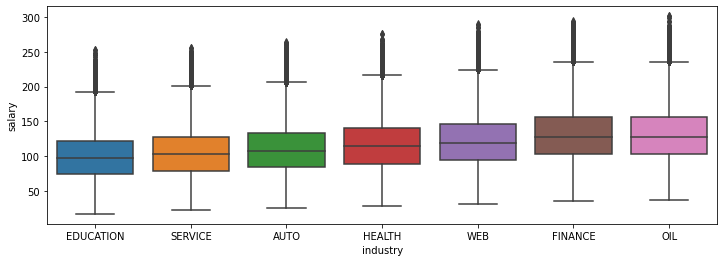

In [47]:
#Feature "industry"
plt.figure(figsize = (12,4))
mean = new_train_features.groupby("industry")['salary'].mean()
levels = mean.sort_values().index.tolist()
sns.boxplot(x="industry", y="salary", data=new_train_features, order = levels)

### ---- 2.6.6 Look for Correlation Between Features ----

In [48]:
new_train_features_encode = new_train_features.copy()

In [49]:
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = new_train_features_encode[new_train_features_encode[col] == cat]['salary'].mean()
    df[col] = df[col].map(cat_dict)

In [50]:
categorical_cols_resume = ["companyId", "jobType", "degree", "major", "industry"]
new_train_features_encode[categorical_cols_resume] = new_train_features_encode[categorical_cols_resume].astype('category')

for col in new_train_features_encode.columns:
    if new_train_features_encode[col].dtype.name == "category":
        encode_label(new_train_features_encode, col)

In [51]:
new_train_features_encode[categorical_cols_resume] = new_train_features_encode[categorical_cols_resume].astype('float64')

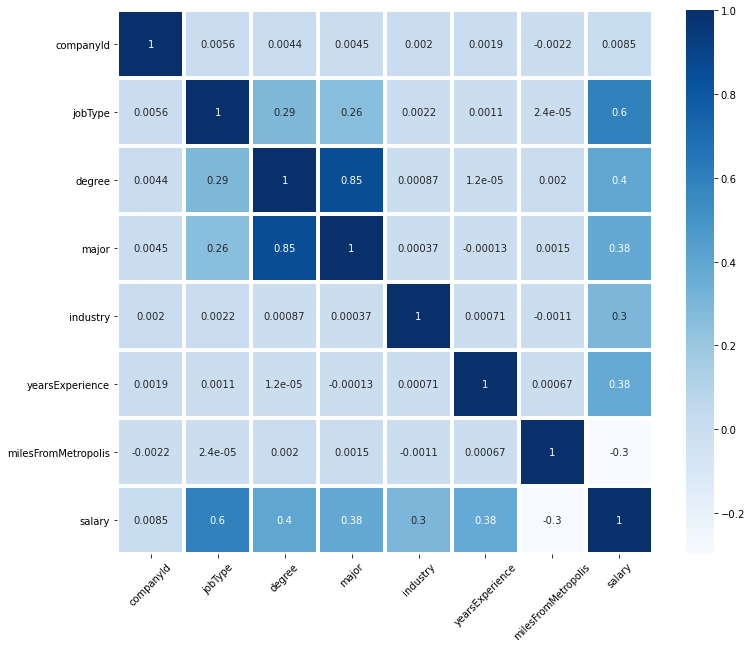

In [52]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(new_train_features_encode[features + ['salary']].corr(), cmap='Blues', annot=True, linewidths=3)
plt.xticks(rotation=45)
plt.show()

We see that jobType is most strongly correlated with salary, followed by degree, major, and yearsExperience.
Among the features, we see that degree and major have a strong degree of correlation and jobType has a moderate degree of correlation with both degree and major.

### ---- 2.7 Establish a baseline ----

As we said in defining our objective for this project, we will measure our model created through MSE (Mean Squared Error). I believe that this is a good metric to measure our model considering that the problem is a regression.
Before building our most complex predictive models, let's start with a baseline metric widely used in companies by HR areas. So, let's calculate the average wages by type of job.

In [53]:
df_baseline = new_train_features.groupby('jobType', as_index = False).mean().round(2)
df_baseline.rename(columns = {'salary':'avg_salary'}, inplace = True)
df_baseline = df_baseline[['jobType', 'avg_salary']]
df_baseline

,jobType,avg_salary
0,CEO,145.31
1,CFO,135.46
2,CTO,135.48
3,JANITOR,70.81
4,JUNIOR,95.33
5,MANAGER,115.37
6,SENIOR,105.49
7,VICE_PRESIDENT,125.37


In [54]:
df_baseline = pd.merge(new_train_features, df_baseline, on = 'jobType')
df_baseline.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,avg_salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130,135.46
1,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178,135.46
2,JOB1362684407712,COMP27,CFO,BACHELORS,CHEMISTRY,AUTO,9,70,131,135.46
3,JOB1362684407718,COMP0,CFO,BACHELORS,PHYSICS,HEALTH,18,32,132,135.46
4,JOB1362684407744,COMP7,CFO,BACHELORS,COMPSCI,EDUCATION,15,25,140,135.46


In [55]:
mse_baseline = mean_squared_error(df_baseline['salary'], df_baseline['avg_salary']).round(2)
mse_baseline

963.93

Our baseline MSE was 963.93 for average salaries compared to real salaries. Our goal is to decrease this MSE by at least 60%.

### ---- 2.8 Hypothesize solution ----

For our first version of our model I believe that we will be able to achieve our goal without adding new features. If this does not happen, we can add new features and create new models to reach the planned goal.
I will create 4 different models to understand which one has the best result and if necessary we can customize the model created to achieve even better results.

## Part 3 - DEVELOP

### ---- 7 Engineer features  ----

In [56]:
#Preparing train data for modeling.

#Performs one-hot encoding on all categorical variables and combines result with continous variables
def one_hot_encode_feature_df(df, cat_vars=None, num_vars=None):
    cat_df = pd.get_dummies(df[cat_vars])
    num_df = df[num_vars].apply(pd.to_numeric)
    return pd.concat([cat_df, num_df], axis=1)#,ignore_index=False)

In [57]:
#Encode categorical data (Train and Test data)
train_df_model = one_hot_encode_feature_df(new_train_features, cat_vars=categorical_cols_resume, num_vars=numerical_cols)
test_df_model = one_hot_encode_feature_df(test_features, cat_vars=categorical_cols_resume, num_vars=numerical_cols)

In [58]:
train_df_model.head()

,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,companyId_COMP16,companyId_COMP17,...,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,10,83
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,73
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,10,38
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,8,17
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,8,16


In [59]:
test_df_model.head()

,companyId_COMP0,companyId_COMP1,companyId_COMP10,companyId_COMP11,companyId_COMP12,companyId_COMP13,companyId_COMP14,companyId_COMP15,companyId_COMP16,companyId_COMP17,...,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB,yearsExperience,milesFromMetropolis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,22,73
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,20,47
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,17,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,14,96
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,10,44


In [60]:
#get target df
target_df_model = new_train_features["salary"]

In [61]:
target_df_model.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

### ---- 8 Create models ----

In [62]:
#Creating some parameters and variables to store the information of our models.

#Initialize model list and dicts
models = []
mean_mse = {}
cv_std = {}
res = {}

#Define number of processes to run in parallel
num_procs = 2

#Shared model paramaters
verbose_lvl = 0

In [63]:
#Create models -- hyperparameter tuning already done by hand for each model
lr = LinearRegression()
lr_std_pca = make_pipeline(StandardScaler(), PCA(), LinearRegression())
rf = RandomForestRegressor(n_estimators=150, n_jobs=num_procs, max_depth=25, min_samples_split=60, \
                           max_features=30, verbose=verbose_lvl)
gbm = GradientBoostingRegressor(n_estimators=150, max_depth=5, loss='ls', verbose=verbose_lvl)

In [64]:
#Function to run and store information for each model.
def train_model(model, feature_df, target_df, num_procs, mean_mse, cv_std):
    neg_mse = cross_val_score(model, feature_df, target_df, cv=2, n_jobs=num_procs, scoring='neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)

### ---- 9 Test models ----

In [65]:
#Function to print the results of the models.
def print_summary(model, mean_mse, cv_std):
    print('\nModel:', model)
    print('Average MSE:', mean_mse[model])
    print('Standard deviation during CV:', cv_std[model])

In [66]:
#Parallel cross-validate models, using MSE as evaluation metric, and print summaries
models.extend([lr, lr_std_pca, rf, gbm])

for model in models:
    train_model(model, train_df_model, target_df_model, num_procs, mean_mse, cv_std)
    print_summary(model, mean_mse, cv_std)


Model: LinearRegression()
Average MSE: 384.4952857767195
Standard deviation during CV: 1.3973475803366568

Model: Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])
Average MSE: 384.49892223597647
Standard deviation during CV: 1.396038698815488

Model: RandomForestRegressor(max_depth=25, max_features=30, min_samples_split=60,
                      n_estimators=150, n_jobs=2)
Average MSE: 367.79256991871705
Standard deviation during CV: 1.3583963789741063

Model: GradientBoostingRegressor(max_depth=5, n_estimators=150)
Average MSE: 357.2071000548941
Standard deviation during CV: 0.816047514615974


### ---- 10 Select best model  ----

In [67]:
#Choose model with lowest mse
model = min(mean_mse, key=mean_mse.get)
print('\nPredictions calculated using model with lowest MSE:', model)


Predictions calculated using model with lowest MSE: GradientBoostingRegressor(max_depth=5, n_estimators=150)


## Part 4 - DEPLOY

In [68]:
#train model on entire dataset
model.fit(train_df_model, target_df_model)

#create predictions based on test data
predictions = model.predict(test_df_model)

### ---- 11 Automate pipeline ----

In [69]:
def save_results(model, mean_mse, predictions, feature_importances):
    '''saves model, model summary, feature importances, and predictions'''
    with open('model.txt', 'w') as file:
        file.write(str(model))
    feature_importances.to_csv('feature_importances.csv') 
    np.savetxt('predictions.csv', predictions, delimiter=',')

In [70]:
#store feature importances
if hasattr(model, 'feature_importances_'):
    importances = model.feature_importances_
else:
    #linear models don't have feature_importances_
    importances = [0]*len(feature_df.columns)
    
feature_importances = pd.DataFrame({'feature':train_df_model.columns, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
#set index to 'feature'
feature_importances.set_index('feature', inplace=True, drop=True)

#save results
save_results(model, mean_mse[model], predictions, feature_importances)

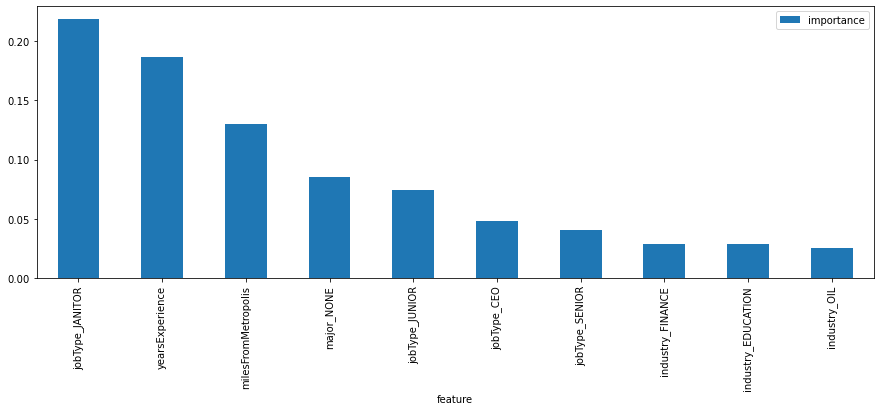

In [71]:
#The 10 most important features
feature_importances[0:10].plot.bar(figsize=(15,5))
plt.show()

### ---- 12 Deploy solution ----

In [72]:
!cat model.txt

GradientBoostingRegressor(max_depth=5, n_estimators=150)

In [73]:
!head feature_importances.csv

feature,importance
jobType_JANITOR,0.21828490267929487
yearsExperience,0.1867195510686955
milesFromMetropolis,0.12977100644517692
major_NONE,0.08562541642555246
jobType_JUNIOR,0.07476353234828298
jobType_CEO,0.048493605808699596
jobType_SENIOR,0.04021900431816625
industry_FINANCE,0.028978987406733363
industry_EDUCATION,0.028568660279765335


In [74]:
!head predictions.csv

1.112319470299420630e+02
9.358076805149367772e+01
1.789313055117175111e+02
1.043686516871983940e+02
1.170745237113817439e+02
1.507164339871123104e+02
9.642931186092509677e+01
1.185500271711067768e+02
1.069490341265069020e+02
9.826842079587535750e+01


### ---- 13 Measure efficacy ----

In [75]:
model = min(mean_mse, key=mean_mse.get)
print('\nModel with the best performance (Lowest MSE):', model)
print('\nMSE value:',min(mean_mse.values()))
print('\nImproved model % (GradientBoostingRegressor x Baseline):', 100 - (min(mean_mse.values()) / mse_baseline * 100).round(2))


Model with the best performance (Lowest MSE): GradientBoostingRegressor(max_depth=5, n_estimators=150)

MSE value: 357.2071000548941

Improved model % (GradientBoostingRegressor x Baseline): 62.94
